# Manisha Bhardwaj

## Task 1 - Prediction using supervised ML

**To predict the percentage of marks that a student is expected to score based on the number of study hours using simple linear regression involving 2 variables.**

In [3]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Plotting our data points on 2-D graph to visualize our dataset and understand any relationship between the data manually

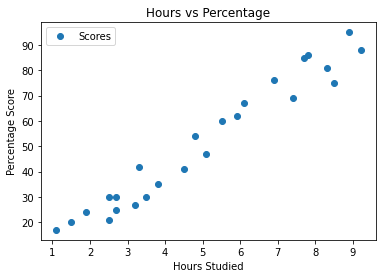

In [35]:
# Plottting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

> **Note: There's a positive linear relation between the number of hours studied and the percentage score of students.**

## Preparing the data

Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

We now have our attributes and labels.
We then split this data into training and test sets by using Scikit-Learn's buil-in train_test_split() method.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

## Training the Algorithm

After splitting the data into training and testing sets, we need to train the algorithm now.

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete")

Training complete


## Plotting the regression line

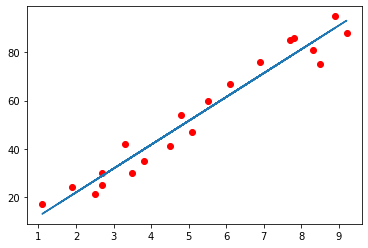

In [44]:
# Plotting the regression line for the training data
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X_train,y_train, color = "red")
plt.plot(X,line);
plt.show()

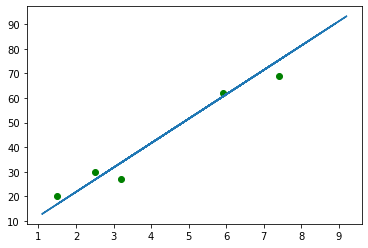

In [48]:
# Plotting the regression line for the test data
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X_test,y_test, color = "green")
plt.plot(X,line);
plt.show()

## Making Predictions

In [50]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing Actual vs Predicted model

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Plotting Actual vs Predicted values for visualization

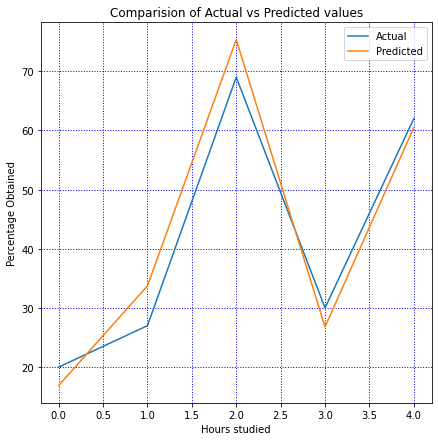

In [57]:
df.plot(kind='line', figsize=(7,7))
plt.title('Comparision of Actual vs Predicted values')
plt.grid(which='major',linestyle=':',linewidth='1',color='blue')
plt.grid(which='minor',linestyle=':',linewidth='1',color='black')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Obtained')
plt.show()

> **Note: We can see that the predicted values follow a similar pattern or trend when compared to the actual values.**

## Q. Predicted score of a student who studies for 9.25 hours per day?

In [32]:
hours = np.array(9.25)
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of hours student studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of hours student studied = [[9.25]]
Predicted Score = 93.69173248737538


> **Note: The predicted score of a student studying for 9.25 hours is approximately 93.7.**

## Evaluating the model

Evaluates the performance of the algorithm. It's important to compare how well different algorithms perform on a particular dataset.

In [56]:
from sklearn import metrics
from math import sqrt
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',mae)
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:' ,rmse)

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
